In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### data

In [2]:
file=open("data/RegData.csv")
data=np.loadtxt(file , delimiter=",")

In [3]:
#explore
data

array([[2.9000001 , 4.        ],
       [6.69999981, 7.4000001 ],
       [4.9000001 , 5.        ],
       [7.9000001 , 7.19999981],
       [9.80000019, 7.9000001 ],
       [6.9000001 , 6.0999999 ],
       [6.0999999 , 6.        ],
       [6.19999981, 5.80000019],
       [6.        , 5.19999981],
       [5.0999999 , 4.19999981],
       [4.69999981, 4.        ],
       [4.4000001 , 4.4000001 ],
       [5.80000019, 5.19999981]])

#### Define variables X and y. Assign first column data to X and second column to y
<b>Note:</b> X is the independent variable (input to LR model) and y is the dependent variable (output)

In [4]:
X=data[:,0]
print(X)


[2.9000001  6.69999981 4.9000001  7.9000001  9.80000019 6.9000001
 6.0999999  6.19999981 6.         5.0999999  4.69999981 4.4000001
 5.80000019]


In [5]:
Y=data[:,1]
print(Y)

[4.         7.4000001  5.         7.19999981 7.9000001  6.0999999
 6.         5.80000019 5.19999981 4.19999981 4.         4.4000001
 5.19999981]


#### Plot the original data (scatter plot of X,y)

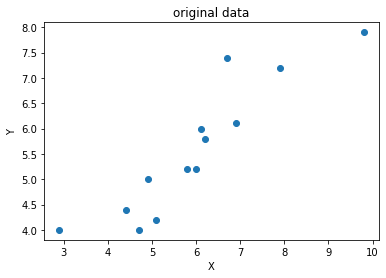

In [6]:
plt.plot(X,Y,'o')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("original data")
plt.show()

# LR implementation

## 1. Batch Gradient Descent

In [7]:
def Batch_GD(x,y,alpha=0.001, iterations_no=100):
    #1. intialize parameters
    theta_0=0
    theta_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        #2. get predicted output

        y_hat=theta_0+theta_1*x

        #3. cost function
        J=0
        for i in range(len(x)):
            J +=(y_hat[i]-y[i])**2
        
        J /=(2*len(x))
        

        print('cost= ', J)
        #4. gradient

        th0_gd = 0 
        th1_gd = 0
        for i in range(len(x)):
            th0_gd += (y_hat[i]-y[i])
            th1_gd += (y_hat[i]-y[i])*x[i]

        th0_gd /= (len(x))
        th1_gd /= (len(x))

        #5. update parameters 
        theta_0 = theta_0 - alpha * th0_gd
        theta_1 = theta_1 - alpha * th1_gd
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
    return y_hat,theta_0 , theta_1

In [8]:
y_predicted, th_0, th_1=Batch_GD(X,Y)

epoch  0
cost=  16.305384479692318
theta 0 =  0.005569230739769231
theta 1 =  0.03504384604321537
epoch  1
cost=  15.070907994095792
theta 0 =  0.010924246580564925
theta 1 =  0.06871715274511
epoch  2
cost=  13.931064553305797
theta 0 =  0.01607342171768198
theta 1 =  0.10107349950678265
epoch  3
cost=  12.878599687059797
theta 0 =  0.021024802968708463
theta 1 =  0.13216437111584672
epoch  4
cost=  11.90681504520672
theta 0 =  0.025786122571909754
theta 1 =  0.1620392396324827
epoch  5
cost=  11.009525766120202
theta 0 =  0.030364810484277395
theta 1 =  0.19074564307426725
epoch  6
cost=  10.181021113204745
theta 0 =  0.03476800619880247
theta 1 =  0.21832926102492636
epoch  7
cost=  9.416028128966154
theta 0 =  0.03900257009976888
theta 1 =  0.24483398728726768
epoch  8
cost=  8.709678075323009
theta 0 =  0.04307509437412689
theta 1 =  0.2703019996958457
epoch  9
cost=  8.057475446568752
theta 0 =  0.04699191349630147
theta 1 =  0.294773827200396
epoch  10
cost=  7.45526935776777
th

epoch  79
cost=  0.2309034108807907
theta 0 =  0.1415599601677513
theta 1 =  0.8587349774432124
epoch  80
cost=  0.2286301211554586
theta 0 =  0.14187485499852004
theta 1 =  0.8601640281124842
epoch  81
cost=  0.22653047344715535
theta 0 =  0.14218092658661677
theta 1 =  0.8615366669755122
epoch  82
cost=  0.22459115662720094
theta 0 =  0.14247851962250022
theta 1 =  0.8628550994126368
epoch  83
cost=  0.22279987998412262
theta 0 =  0.14276796532144337
theta 1 =  0.8641214445878643
epoch  84
cost=  0.22114529499953597
theta 0 =  0.14304958195032746
theta 1 =  0.865337738819377
epoch  85
cost=  0.2196169231206085
theta 0 =  0.14332367533384163
theta 1 =  0.8665059388182772
epoch  86
cost=  0.2182050890694081
theta 0 =  0.14359053934089347
theta 1 =  0.8676279248007175
epoch  87
cost=  0.21690085926468994
theta 0 =  0.1438504563520039
theta 1 =  0.8687055034783663
epoch  88
cost=  0.21569598496420112
theta 0 =  0.14410369770843007
theta 1 =  0.869740410931965
epoch  89
cost=  0.214582849

#### Plot  LR equation output (fitted line) with the original data (scatter plot of X,Y)

Text(0, 0.5, 'y')

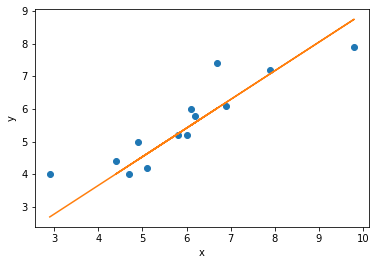

In [9]:
plt.plot(X,Y,"o")
plt.plot(X,y_predicted)
plt.xlabel("x")
plt.ylabel("y")

#### Use R2 score to evaluate LR equation output

In [10]:
from sklearn.metrics import r2_score

In [11]:
r2_score(Y,y_predicted)

0.7401129798021142

## GD vectorize Implementation
 Implement GD without iterate through data points i.e. use vector operations

In [12]:
losses=[]
ths_0=[]
ths_1=[]
def Vectorize_Batch_GD(x,y,alpha=0.001, iterations_no=100):
    #1. intialize parameters
    theta_0=0
    theta_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x).sum())/(len(x))

        #5. update parameters 
        theta_0 = theta_0 - alpha * th0_gd
        theta_1 = theta_1 - alpha * th1_gd
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
    
    return y_hat,theta_0 , theta_1

In [13]:
y_pred, th0_optimum, th1_optimum=Vectorize_Batch_GD(X,Y)

epoch  0
cost=  16.305384479692318
theta 0 =  0.00556923073976923
theta 1 =  0.03504384604321537
epoch  1
cost=  15.070907994095792
theta 0 =  0.010924246580564925
theta 1 =  0.06871715274511
epoch  2
cost=  13.931064553305797
theta 0 =  0.01607342171768198
theta 1 =  0.10107349950678265
epoch  3
cost=  12.878599687059797
theta 0 =  0.021024802968708463
theta 1 =  0.13216437111584672
epoch  4
cost=  11.90681504520672
theta 0 =  0.025786122571909754
theta 1 =  0.1620392396324827
epoch  5
cost=  11.009525766120202
theta 0 =  0.030364810484277395
theta 1 =  0.19074564307426725
epoch  6
cost=  10.181021113204745
theta 0 =  0.03476800619880247
theta 1 =  0.21832926102492636
epoch  7
cost=  9.416028128966154
theta 0 =  0.03900257009976888
theta 1 =  0.24483398728726768
epoch  8
cost=  8.709678075323009
theta 0 =  0.04307509437412689
theta 1 =  0.2703019996958457
epoch  9
cost=  8.057475446568752
theta 0 =  0.04699191349630147
theta 1 =  0.294773827200396
epoch  10
cost=  7.45526935776777
the

epoch  97
cost=  0.20823990636059875
theta 0 =  0.1461222998993066
theta 1 =  0.8773892394334755
epoch  98
cost=  0.20769272253604226
theta 0 =  0.14632156778420533
theta 1 =  0.878079222595362
epoch  99
cost=  0.20718686081651805
theta 0 =  0.14651652834761955
theta 1 =  0.8787416874663155


Text(0, 0.5, 'y')

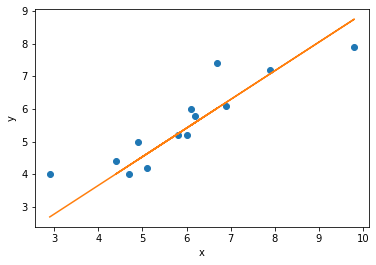

In [14]:
plt.plot(X,Y,"o")
plt.plot(X,y_pred)
plt.xlabel("x")
plt.ylabel("y")

In [15]:
r2_score(Y,y_pred)

0.740112979802114

### Plot loss vs. iterations

Text(0, 0.5, 'loss')

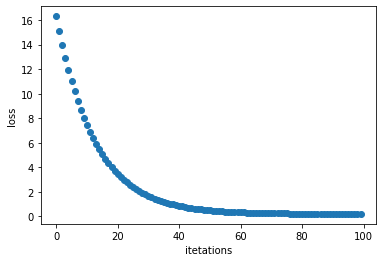

In [16]:
plt.plot(losses,'o')
plt.xlabel("itetations")
plt.ylabel("loss")

### plot loss vs. parameters

Text(0, 0.5, 'loss')

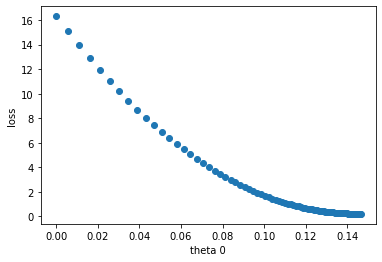

In [17]:
plt.plot(ths_0, losses,'o')
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

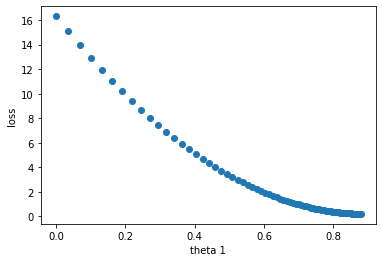

In [18]:
plt.plot(ths_1, losses,'o')
plt.xlabel("theta 1")
plt.ylabel("loss")

# using sklearn

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
x=X.reshape(len(X),1)
y=Y.reshape(len(Y),1)
print(x.shape)

(13, 1)


In [21]:
LR=LinearRegression()

In [22]:
#train the model(fit the model on training data)
LR=LR.fit(x,y)

In [23]:
#predict values
predicted_values=LR.predict(x)
predicted_values

array([[3.44824549],
       [6.08745623],
       [4.83730388],
       [6.92089146],
       [8.240497  ],
       [6.22636227],
       [5.67073878],
       [5.74019163],
       [5.60128593],
       [4.97620959],
       [4.69839784],
       [4.49003928],
       [5.46238022]])

#### Plot model output (fitted line) with the original data (scatter plot of X,y)

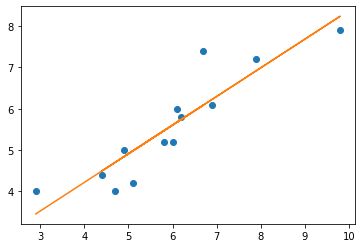

In [24]:
plt.plot(x , y,'o')
plt.plot(x,predicted_values)


In [25]:
# Use R2 score to evaluate model output
r2_score(y,predicted_values)

0.8213156778363777

# Try stop conditon 

In [26]:
#data
x1=np.linspace(0,20)
y1=-2*x1+1

Text(0, 0.5, 'y')

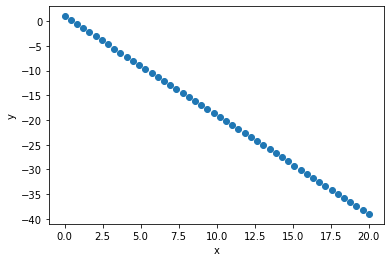

In [27]:
plt.plot(x1,y1,"o")
plt.xlabel("x")
plt.ylabel("y")

In [28]:

def Vectorized_Batch_GD(x,y,alpha=0.001, iterations_no=100):
    losses=[]
    ths_0=[]
    ths_1=[]
    Y_predict_list=[]
   
    #1. intialize parameters
    theta_0=0
    theta_1=0
    
    for e in range(iterations_no):
        print('======================================================================')
        print('epoch ', e)
        
        ths_0.append(theta_0)
        ths_1.append(theta_1)
        #2. get predicted output

        y_hat=theta_0+theta_1*x
        Y_predict_list.append(y_hat)

        #3. cost function
        error=(y_hat-y)
        
        J=(np.dot(error,error))/(2*len(x))
        
        losses.append(J)  
        print('cost= ', J)
        #4. gradient

        th0_gd =((y_hat - y).sum())/(len(x))
        th1_gd = (np.dot((y_hat - y),x).sum())/(len(x))

        #5. update parameters 
        theta_0 = theta_0 - alpha * th0_gd
        theta_1 = theta_1 - alpha * th1_gd
        print('theta 0 = ', theta_0)
        print('theta 1 = ' , theta_1)
        
        # stop condition
        if (e !=0):
            if (abs(losses[e-1] - losses[e])<0.001):
                break
            
    
    return y_hat,theta_0 , theta_1, ths_0, ths_1, losses, Y_predict_list

In [29]:
Y_predict , theta_0 ,theta_1 , loss,th0_list,th1_list, y_list = Vectorized_Batch_GD(x1,y1)

epoch  0
cost=  249.88775510204084
theta 0 =  -0.019
theta 1 =  -0.2593877551020408
epoch  1
cost=  186.82544901821947
theta 0 =  -0.0353871224489796
theta 1 =  -0.4836475676801333
epoch  2
cost=  139.68837516021622
theta 0 =  -0.04951525964972928
theta 1 =  -0.6775370852987276
epoch  3
cost=  104.45490187382671
theta 0 =  -0.06169037353709228
theta 1 =  -0.845169590600769
epoch  4
cost=  78.11898842228953
theta 0 =  -0.0721769872575475
theta 1 =  -0.990101272621213
epoch  5
cost=  58.43371572199666
theta 0 =  -0.08120379754407782
theta 1 =  -1.1154066782731271
epoch  6
cost=  43.71958378928337
theta 0 =  -0.08896852696380247
theta 1 =  -1.2237439448568161
epoch  7
cost=  32.72122022747044
theta 0 =  -0.0956421189882705
theta 1 =  -1.3174111976268723
epoch  8
cost=  24.50027441454269
theta 0 =  -0.10137236489301352
theta 1 =  -1.3983953090015333
epoch  9
cost=  18.355359342017692
theta 0 =  -0.10628703943810516
theta 1 =  -1.4684140539360702
epoch  10
cost=  13.7622107059909
theta 0 = 

In [30]:
r2_score(y1,Y_predict)

0.9975950054190024

Text(0, 0.5, 'loss')

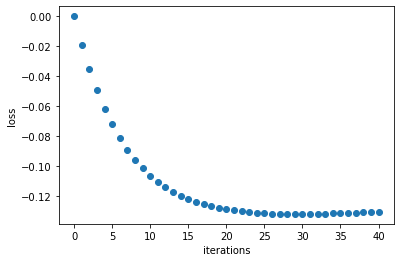

In [31]:
plt.plot(loss,"o")
plt.xlabel("iterations")
plt.ylabel("loss")


Text(0, 0.5, 'loss')

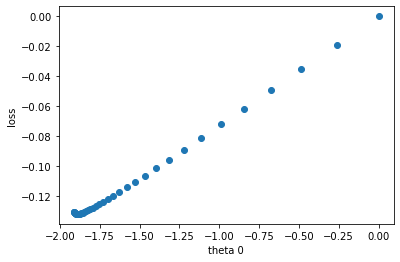

In [32]:
plt.plot(th0_list,loss,'o')
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

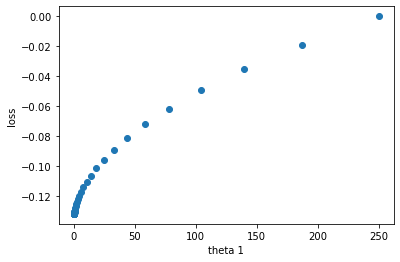

In [33]:
plt.plot(th1_list,loss,'o')
plt.xlabel("theta 1")
plt.ylabel("loss")

#### Plot all regression lines till converge

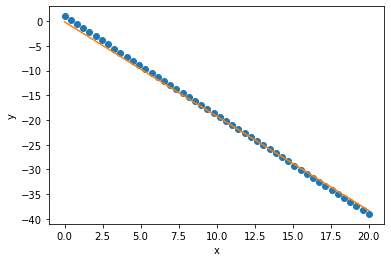

In [34]:
plt.plot(x1,y1,'o')
plt.ylabel("y")
plt.xlabel("x")


plt.plot(x1,Y_predict)# best regression line
    
    
plt.show()



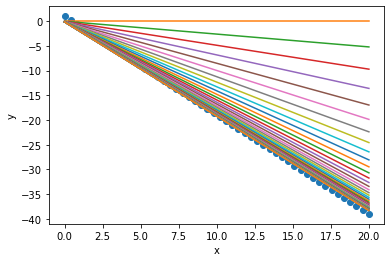

In [35]:
plt.plot(x1,y1,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(th0_list)):
    plt.plot(x1,y_list[i])
#     plt.plot(x1, th0_list[i]+th1_list[i]*x1) #didn't make sense !!!!!!!!!
    
    
plt.show()



###### try different learning rate and number of iterations

In [36]:
Y_hat , th_0 ,th_1,ths0,ths1,l, y_hat_list = Vectorized_Batch_GD(x1,y1,0.01,100)

epoch  0
cost=  249.88775510204084
theta 0 =  -0.19
theta 1 =  -2.593877551020408
epoch  1
cost=  31.527821438771234
theta 0 =  -0.1187122448979592
theta 1 =  -1.6749608496459811
epoch  2
cost=  4.104740105830764
theta 0 =  -0.1400290374843815
theta 1 =  -2.0008974603269043
epoch  3
cost=  0.6601186550646106
theta 0 =  -0.12853900107684726
theta 1 =  -1.8856857324646767
epoch  4
cost=  0.22679212340254964
theta 0 =  -0.1286850378196111
theta 1 =  -1.9268061518943662
epoch  5
cost=  0.1716373537320427
theta 0 =  -0.12471757225197838
theta 1 =  -1.9125252802546875
epoch  6
cost=  0.16397836159451523
theta 0 =  -0.12221786850398984
theta 1 =  -1.917876614931339
epoch  7
cost=  0.16228778783493517
theta 0 =  -0.11920802832581603
theta 1 =  -1.9162699998060753
epoch  8
cost=  0.16135047568290037
theta 0 =  -0.11638894806195035
theta 1 =  -1.9171283809081678


Text(0, 0.5, 'loss')

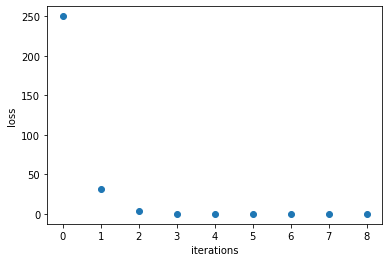

In [37]:
plt.plot(l,"o")
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

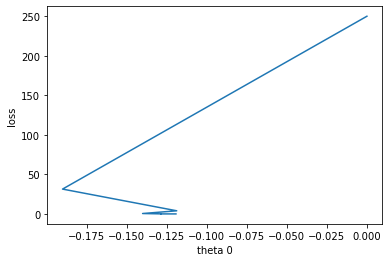

In [38]:
plt.plot(ths0,l) #overshot and converge
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

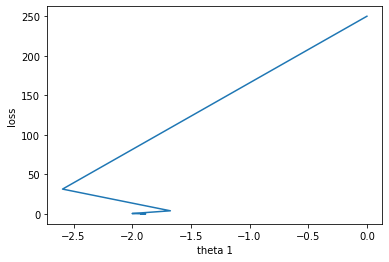

In [39]:
plt.plot(ths1,l)
plt.xlabel("theta 1")
plt.ylabel("loss")

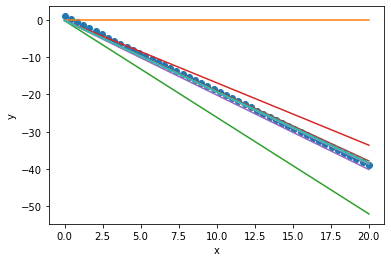

In [40]:
plt.plot(x1,y1,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(ths0)):
    plt.plot(x1,y_hat_list[i])
    
    
plt.show()

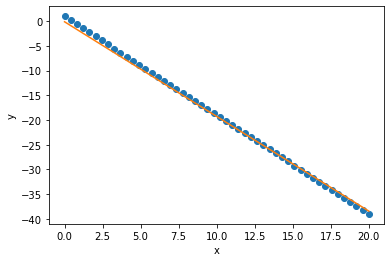

In [41]:
#best fitted line
plt.plot(x1,y1,'o')
plt.ylabel("y")
plt.xlabel("x")
plt.plot(x1,Y_hat)
    
    
plt.show()

# stochastic GD

In [81]:
def stochasitc_GD(x,y,alpha=0.001,Epochs_no=100):

    loss=[]
    th0_list=[]
    th1_list=[] 
    Y_predict_list=[] #list to contain all predicted values 
    #1. intialize the parameters 
    
    theta_0=0
    theta_1=0
    
    for e in range(Epochs_no): #loop through epochs 
        print('=====================================================')
        print('epoch ', e)
        Y_pred_per_epoch=[]#list to contain the predicted values for each epoch
        
        for i in range (x.shape[0]):#loop on all data in the batch (all observations) (len(x))
            
#             th0_list.append(theta_0)
#             th1_list.append(theta_1)
            
            #2.predicted value
            y_pred= theta_0 + theta_1 * x[i] #one value
            Y_pred_per_epoch.append(y_pred)
#             Y_predict_list.append(y_pred)
            
            #3.cost function
            J=((y_pred-y[i])**2)/2
            loss.append(J)
            
            
            #4. gradient
            
            grad_th0= y_pred -y[i]
            grad_th1= (y_pred-y[i])*x[i]
            
            #5update parameters
            
            theta_0 = theta_0 - alpha * grad_th0
            theta_1 = theta_1 - alpha * grad_th1
        
            th0_list.append(theta_0)
            th1_list.append(theta_1)
            
        print("cost= ",J)
        
        Y_predict_list.append(Y_pred_per_epoch)
        #stop condition
        if(e!=0):
            if (abs(loss[(e-1)*len(x)]-loss[e*len(x)])<0.00001):
                break
    return Y_pred_per_epoch, Y_predict_list, th0_list, th1_list, theta_0, theta_1 ,loss
            
    
    

In [82]:
Y_hat , y_pred_list, all_th0, all_th1, th0, th1 , loss_list= stochasitc_GD(x1,y1,0.0001,1000)

epoch  0
cost=  214.21025742604553
epoch  1
cost=  56.7938200533083
epoch  2
cost=  15.677071402920276
epoch  3
cost=  4.654473192446179
epoch  4
cost=  1.5611177939281917
epoch  5
cost=  0.6270143422833283
epoch  6
cost=  0.3148492489424965
epoch  7
cost=  0.19773713423840764
epoch  8
cost=  0.1488516737967059
epoch  9
cost=  0.12670266492811683
epoch  10
cost=  0.11607942026783916
epoch  11
cost=  0.11076649687977878
epoch  12
cost=  0.1080015617472198
epoch  13
cost=  0.10648741183802726
epoch  14
cost=  0.10559489856022879
epoch  15
cost=  0.10501345089547301
epoch  16
cost=  0.10458832938558035
epoch  17
cost=  0.10424206616042035
epoch  18
cost=  0.10393578296502931
epoch  19
cost=  0.103649943647125
epoch  20
cost=  0.10337472479888951
epoch  21
cost=  0.10310518490387274
epoch  22
cost=  0.10283883738386929
epoch  23
cost=  0.10257443046319194
epoch  24
cost=  0.10231133353219925
epoch  25
cost=  0.10204922847830541
epoch  26
cost=  0.10178795440629972
epoch  27
cost=  0.101527

epoch  107
cost=  0.08271253336635498
epoch  108
cost=  0.0825008981307057
epoch  109
cost=  0.08228980440274927
epoch  110
cost=  0.08207925079693403
epoch  111
cost=  0.08186923593126569
epoch  112
cost=  0.0816597584272731
epoch  113
cost=  0.08145081691001689
epoch  114
cost=  0.08124241000807249
epoch  115
cost=  0.08103453635354164
epoch  116
cost=  0.08082719458199827
epoch  117
cost=  0.08062038333252582
epoch  118
cost=  0.08041410124769172
epoch  119
cost=  0.08020834697353042
epoch  120
cost=  0.0800031191595352
epoch  121
cost=  0.07979841645866682
epoch  122
cost=  0.07959423752732253
epoch  123
cost=  0.07939058102534483
epoch  124
cost=  0.07918744561599338
epoch  125
cost=  0.07898482996596512
epoch  126
cost=  0.07878273274536336
epoch  127
cost=  0.07858115262768403
epoch  128
cost=  0.0783800882898272
epoch  129
cost=  0.0781795384120693
epoch  130
cost=  0.07797950167807462
epoch  131
cost=  0.07777997677487594
epoch  132
cost=  0.07758096239284974
epoch  133
cost= 

cost=  0.05135929948582206
epoch  294
cost=  0.05122788726802645
epoch  295
cost=  0.05109681129256413
epoch  296
cost=  0.05096607069910617
epoch  297
cost=  0.050835664629508726
epoch  298
cost=  0.050705592227837284
epoch  299
cost=  0.05057585264034327
epoch  300
cost=  0.050446445015452
epoch  301
cost=  0.05031736850378008
epoch  302
cost=  0.050188622258112076
epoch  303
cost=  0.050060205433399826
epoch  304
cost=  0.04993211718676623
epoch  305
cost=  0.049804356677484334
epoch  306
cost=  0.04967692306696542
epoch  307
cost=  0.04954981551879199
epoch  308
cost=  0.04942303319866556
epoch  309
cost=  0.04929657527443509
epoch  310
cost=  0.049170440916069494
epoch  311
cost=  0.049044629295672666
epoch  312
cost=  0.04891913958744938
epoch  313
cost=  0.0487939709677425
epoch  314
cost=  0.04866912261497679
epoch  315
cost=  0.04854459370969159
epoch  316
cost=  0.04842038343451809
epoch  317
cost=  0.04829649097419416
epoch  318
cost=  0.048172915515528346
epoch  319
cost=  

cost=  0.03924562222404979
epoch  399
cost=  0.039145205078430285
epoch  400
cost=  0.03904504486855611
epoch  401
cost=  0.03894514093700747
epoch  402
cost=  0.038845492628050836
epoch  403
cost=  0.03874609928762507
epoch  404
cost=  0.03864696026334922
epoch  405
cost=  0.038548074904512564
epoch  406
cost=  0.03844944256206078
epoch  407
cost=  0.03835106258859983
epoch  408
cost=  0.038252934338407714
epoch  409
cost=  0.0381550571673951
epoch  410
cost=  0.038057430433138674
epoch  411
cost=  0.037960053494841876
epoch  412
cost=  0.03786292571336233
epoch  413
cost=  0.037766046451180486
epoch  414
cost=  0.03766941507241721
epoch  415
cost=  0.03757303094281816
epoch  416
cost=  0.0374768934297479
epoch  417
cost=  0.03738100190219192
epoch  418
cost=  0.037285355730756586
epoch  419
cost=  0.03718995428764583
epoch  420
cost=  0.03709479694668451
epoch  421
cost=  0.03699988308328542
epoch  422
cost=  0.036905212074472594
epoch  423
cost=  0.03681078329885812
epoch  424
cost=

epoch  509
cost=  0.02953163337093579
epoch  510
cost=  0.029456071253160358
epoch  511
cost=  0.029380702474967782
epoch  512
cost=  0.029305526541666165
epoch  513
cost=  0.029230542959819292
epoch  514
cost=  0.029155751237259102
epoch  515
cost=  0.029081150883089473
epoch  516
cost=  0.02900674140764891
epoch  517
cost=  0.028932522322543532
epoch  518
cost=  0.028858493140623515
epoch  519
cost=  0.02878465337598864
epoch  520
cost=  0.028711002543973362
epoch  521
cost=  0.028637540161167697
epoch  522
cost=  0.028564265745385273
epoch  523
cost=  0.028491178815677407
epoch  524
cost=  0.02841827889232504
epoch  525
cost=  0.028345565496844242
epoch  526
cost=  0.02827303815196296
epoch  527
cost=  0.028200696381636706
epoch  528
cost=  0.028128539711040533
epoch  529
cost=  0.028056567666566105
epoch  530
cost=  0.027984779775808696
epoch  531
cost=  0.02791317556757774
epoch  532
cost=  0.027841754571888894
epoch  533
cost=  0.02777051631995945
epoch  534
cost=  0.027699460344

cost=  0.018478774938574326
epoch  693
cost=  0.018431493592814836
epoch  694
cost=  0.01838433322508066
epoch  695
cost=  0.018337293525826887
epoch  696
cost=  0.018290374186292924
epoch  697
cost=  0.0182435748985251
epoch  698
cost=  0.01819689535534618
epoch  699
cost=  0.018150335250369798
epoch  700
cost=  0.018103894277986372
epoch  701
cost=  0.018057572133376127
epoch  702
cost=  0.018011368512495022
epoch  703
cost=  0.017965283112079646
epoch  704
cost=  0.017919315629639956
epoch  705
cost=  0.017873465763464137
epoch  706
cost=  0.017827733212607347
epoch  707
cost=  0.017782117676897916
epoch  708
cost=  0.017736618856930134
epoch  709
cost=  0.017691236454061083
epoch  710
cost=  0.017645970170422173
epoch  711
cost=  0.017600819708895914
epoch  712
cost=  0.017555784773135453
epoch  713
cost=  0.017510865067544065
epoch  714
cost=  0.01746606029728934
epoch  715
cost=  0.017421370168277425
epoch  716
cost=  0.01737679438718444
epoch  717
cost=  0.017332332661432068
epo

cost=  0.013904949793244076
epoch  804
cost=  0.013869371420700253
epoch  805
cost=  0.013833884081966508
epoch  806
cost=  0.013798487544122433
epoch  807
cost=  0.013763181574831746
epoch  808
cost=  0.013727965942359777
epoch  809
cost=  0.013692840415561406
epoch  810
cost=  0.013657804763886717
epoch  811
cost=  0.013622858757376032
epoch  812
cost=  0.013588002166652631
epoch  813
cost=  0.01355323476292958
epoch  814
cost=  0.013518556318008286
epoch  815
cost=  0.013483966604264251
epoch  816
cost=  0.01344946539466787
epoch  817
cost=  0.013415052462766662
epoch  818
cost=  0.013380727582682732
epoch  819
cost=  0.013346490529120713
epoch  820
cost=  0.013312341077361694
epoch  821
cost=  0.013278279003256063
epoch  822
cost=  0.013244304083233715
epoch  823
cost=  0.013210416094296878
epoch  824
cost=  0.013176614814015266
epoch  825
cost=  0.01314290002052934
epoch  826
cost=  0.013109271492545482
epoch  827
cost=  0.013075729009338096
epoch  828
cost=  0.013042272350744786


cost=  0.010017300114675151
epoch  932
cost=  0.009991669009156393
epoch  933
cost=  0.009966103485537723
epoch  934
cost=  0.009940603376016903
epoch  935
cost=  0.009915168513218532
epoch  936
cost=  0.009889798730196048
epoch  937
cost=  0.009864493860430687
epoch  938
cost=  0.009839253737830456
epoch  939
cost=  0.00981407819672811
epoch  940
cost=  0.009788967071880142
epoch  941
cost=  0.009763920198465751
epoch  942
cost=  0.009738937412084854
epoch  943
cost=  0.009714018548761028
epoch  944
cost=  0.009689163444932578
epoch  945
cost=  0.009664371937463407
epoch  946
cost=  0.009639643863624219
epoch  947
cost=  0.00961497906111621
epoch  948
cost=  0.009590377368039475
epoch  949
cost=  0.00956583862292258
epoch  950
cost=  0.009541362664698912
epoch  951
cost=  0.009516949332719451
epoch  952
cost=  0.009492598466742948
epoch  953
cost=  0.009468309906936905
epoch  954
cost=  0.009444083493879533
epoch  955
cost=  0.009419919068555839
epoch  956
cost=  0.009395816472362487


Text(0, 0.5, 'loss')

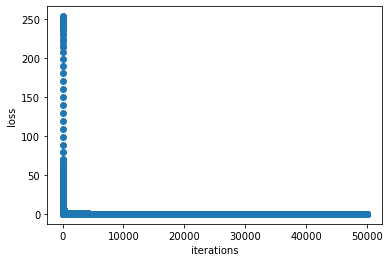

In [83]:
#plot loss vs iterations
plt.plot(loss_list,'o')
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

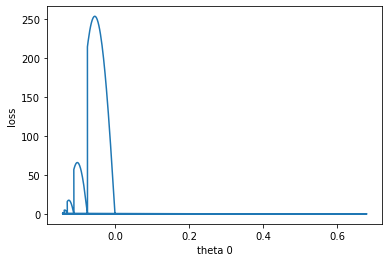

In [84]:
plt.plot(all_th0,loss_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

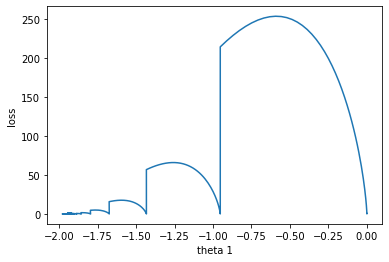

In [85]:
plt.plot(all_th1,loss_list)
plt.xlabel("theta 1")
plt.ylabel("loss")

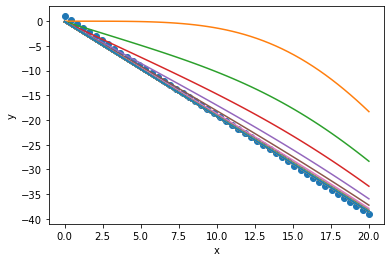

In [86]:
plt.plot(x1,y1,'o')
plt.ylabel("y")
plt.xlabel("x")

for i in range(len(x1)):
#     plt.plot(x1,all_th0[i*(len(x1))]+all_th1[i*(len(x1))]*x1)
    
    plt.plot(x1,y_pred_list[i])
    
plt.show()


Text(0, 0.5, 'y')

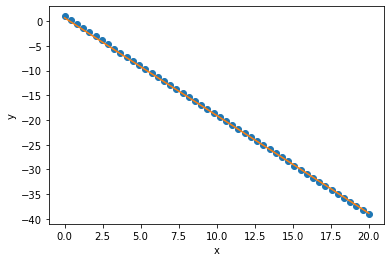

In [87]:
#best fit line
plt.plot(x1,y1,'o')
# plt.plot(x1,th0+th1*x1)
plt.plot(x1,Y_hat)
plt.xlabel('x')
plt.ylabel('y')

In [88]:
r2_score(y1,Y_hat)

0.9998090906875011

use th0+th1*x1 as the y_hat is one value related to one update

## Try with shuffle

In [92]:
X_to_shuffle=np.linspace(0,20)


In [93]:
np.random.shuffle(X_to_shuffle)

In [96]:
y_shuffled=-2*X_to_shuffle+1

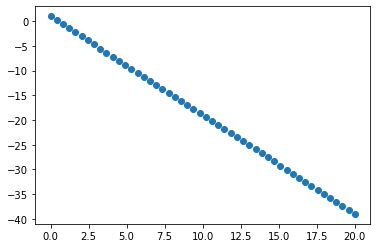

In [97]:
plt.scatter(X_to_shuffle,y_shuffled)

In [100]:
y_sh_hat ,all_predictions_sh ,t0_List_sh,t1_List_sh, t0_sh ,t1_sh,loss_list_sh =stochasitc_GD(X_to_shuffle, y_shuffled,0.001,1000)

epoch  0
cost=  0.006516620749366364
epoch  1
cost=  0.004255849839498647
epoch  2
cost=  0.004147783606540733
epoch  3
cost=  0.004043191631691151
epoch  4
cost=  0.003941237375038221
epoch  5
cost=  0.003841854025692649
epoch  6
cost=  0.003744976754816412
epoch  7
cost=  0.0036505423684316304
epoch  8
cost=  0.0035584892660733
epoch  9
cost=  0.003468757400616311
epoch  10
cost=  0.003381288239098561
epoch  11
cost=  0.003296024724540702
epoch  12
cost=  0.003212911238729257
epoch  13
cost=  0.003131893565935192
epoch  14
cost=  0.0030529188575498987
epoch  15
cost=  0.002975935597606316
epoch  16
cost=  0.0029008935691820278
epoch  17
cost=  0.0028277438216370602
epoch  18
cost=  0.002756438638684886
epoch  19
cost=  0.002686931507267171
epoch  20
cost=  0.0026191770872098074
epoch  21
cost=  0.00255313118165172
epoch  22
cost=  0.002488750708209724
epoch  23
cost=  0.002425993670881555
epoch  24
cost=  0.0023648191326440925
epoch  25
cost=  0.0023051871887564026
epoch  26
cost=  0

epoch  138
cost=  0.00012862943320862826
epoch  139
cost=  0.00012538587726910712
epoch  140
cost=  0.00012222411174783396
epoch  141
cost=  0.00011914207419453267
epoch  142
cost=  0.00011613775416653536
epoch  143
cost=  0.00011320919191652646
epoch  144
cost=  0.00011035447711537968
epoch  145
cost=  0.00010757174760502475
epoch  146
cost=  0.00010485918818402771
epoch  147
cost=  0.00010221502942387573
epoch  148
cost=  9.963754651409435e-05
epoch  149
cost=  9.712505813782347e-05
epoch  150
cost=  9.467592537456643e-05
epoch  151
cost=  9.228855063134596e-05
epoch  152
cost=  8.996137660056183e-05
epoch  153
cost=  8.769288524437302e-05
epoch  154
cost=  8.548159680372222e-05
epoch  155
cost=  8.332606883392865e-05
epoch  156
cost=  8.122489526319128e-05
epoch  157
cost=  7.917670547566836e-05
epoch  158
cost=  7.718016341758706e-05
epoch  159
cost=  7.523396672511961e-05
epoch  160
cost=  7.33368458754276e-05
epoch  161
cost=  7.14875633583553e-05
epoch  162
cost=  6.968491286897

Text(0, 0.5, 'loss')

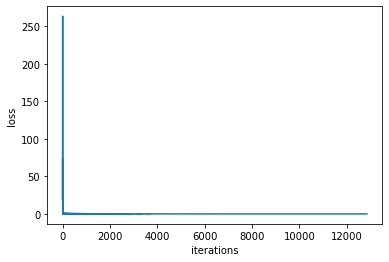

In [101]:
#plot loss vs iterations
plt.plot(loss_list_sh)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

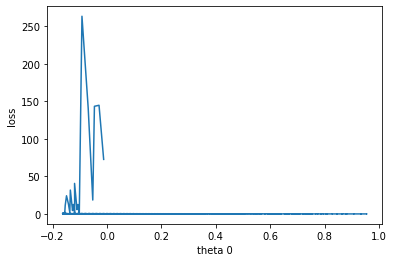

In [102]:
plt.plot(t0_List_sh,loss_list_sh)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

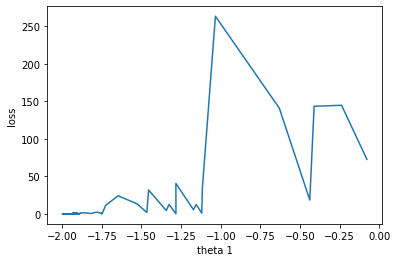

In [103]:
plt.plot(t1_List_sh,loss_list_sh)
plt.xlabel("theta 1")
plt.ylabel("loss")

Text(0, 0.5, 'y')

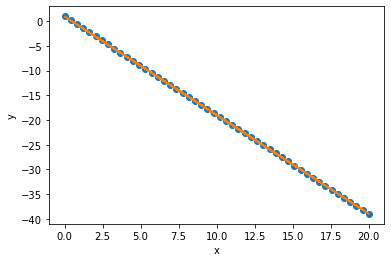

In [104]:
plt.plot(X_to_shuffle,y_shuffled,"o")
plt.plot(X_to_shuffle, y_sh_hat)
plt.xlabel("x")
plt.ylabel("y")

In [105]:
r2_score(y_shuffled, y_sh_hat)

0.9999962601697985

# mini Batch

In [106]:
x_mini=np.linspace(0,20)
y_mini=-2*x_mini+1

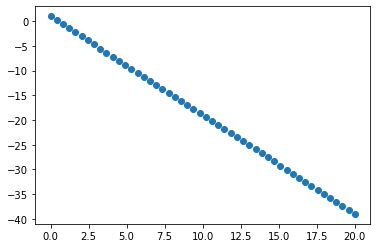

In [108]:
plt.plot(x_mini,y_mini,'o')

In [109]:
def mini_batches(x,y,batch_size):
    x_batches=[]
    y_batches=[]
    number_of_batches=len(x)//batch_size
    
    for i in range(number_of_batches):
        x_batches.append(x[i*batch_size: (i+1)*batch_size])
        y_batches.append(y[i*batch_size : (i+1)*batch_size])
    return x_batches, y_batches
        
    

In [136]:
def MiniBatch_GD(x,y, batch_size=1,alpha=0.001, Epochs_no=100):
    loss=[]
    th0_list=[]
    th1_list=[]
    Y_predict_list=[]
    
    x_batchs=[]
    y_batchs=[]
    
    #get the batches 
    x_batchs,y_batchs=mini_batches(x,y,batch_size)
    
    #1. assume intial values for parameters 
    theta_0=0
    theta_1=0
    
    for e in range(Epochs_no): #epochs loop
        print('==============================================')
        print('epoch ',e)
        
        Y_pred_per_epoch=[]
        for i in range(len(x_batchs)):#loop through all batches
            #2.predict 
            y_predicted= theta_0 + theta_1 * x_batchs[i]
            Y_pred_per_epoch.extend(y_predicted)
            #3.cost 
            error= y_predicted - y_batchs[i]
            J= (np.dot(error, error))/(2*batch_size)
            loss.append(J)
            
            #4.gradient
            grad_th0=( y_predicted - y_batchs[i]).sum()/(batch_size)
            grad_th1= (np.dot((y_predicted - y_batchs[i]), x_batchs[i]))/(batch_size)
            
            #update
            theta_0= theta_0 - alpha * grad_th0
            theta_1=theta_1 - alpha * grad_th1
            
            th0_list.append(theta_0)
            th1_list.append(theta_1)
            
        print('cost= ', J)
        Y_predict_list.append(Y_pred_per_epoch)
        
        #stop condition
        
        if(e!=0):
            if abs(prev_cost - J)<0.0001:
                break
        prev_cost=J
        
    return Y_pred_per_epoch,Y_predict_list ,theta_0 ,theta_1 , loss, th0_list, th1_list
    
            
            
            
    
    

In [137]:
y_mini_predicted,Y_mini_list , th_0 ,th_1 ,cost,list_th0 ,list_th1 =MiniBatch_GD(x_mini,y_mini, 5,0.00001, 100)

epoch  0
cost=  685.4228673440324
epoch  1
cost=  667.3233966251709
epoch  2
cost=  649.7050055882341
epoch  3
cost=  632.5548654577512
epoch  4
cost=  615.8604901261114
epoch  5
cost=  599.6097269929198
epoch  6
cost=  583.7907480493502
epoch  7
cost=  568.3920412009445
epoch  8
cost=  553.4024018224752
epoch  9
cost=  538.8109245386682
epoch  10
cost=  524.606995224741
epoch  11
cost=  510.7802832208778
epoch  12
cost=  497.3207337549167
epoch  13
cost=  484.21856056768354
epoch  14
cost=  471.46423873554556
epoch  15
cost=  459.04849768491476
epoch  16
cost=  446.96231439356325
epoch  17
cost=  435.1969067737552
epoch  18
cost=  423.74372723233
epoch  19
cost=  412.59445640300555
epoch  20
cost=  401.7409970462924
epoch  21
cost=  391.1754681125391
epoch  22
cost=  380.890198963739
epoch  23
cost=  370.87772374985934
epoch  24
cost=  361.1307759355533
epoch  25
cost=  351.6422829732347
epoch  26
cost=  342.4053611186018
epoch  27
cost=  333.4133103847961
epoch  28
cost=  324.6596096

In [140]:
r2_score(y_mini, y_mini_predicted)

0.7548221927355767

Text(0, 0.5, 'y')

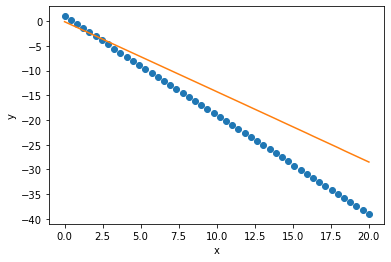

In [141]:
#plot fitted line
plt.plot(x_mini, y_mini,'o')
plt.plot(x_mini, y_mini_predicted)
plt.xlabel('x')
plt.ylabel('y')


Text(0, 0.5, 'loss')

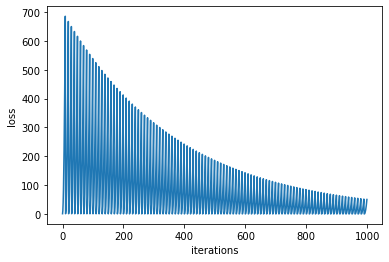

In [142]:
#plot loss vs. iterations
plt.plot(cost)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

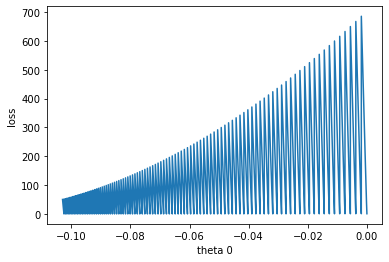

In [143]:
plt.plot(list_th0,cost)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

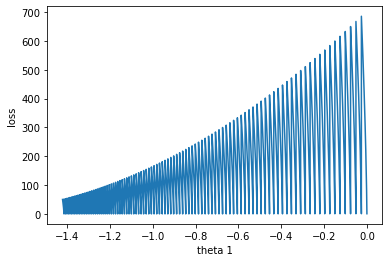

In [144]:
plt.plot(list_th1,cost)
plt.xlabel("theta 1")
plt.ylabel("loss")

## change Batch size

In [158]:
y_mini_pre ,y_mini_pre_list, th0 ,th1 ,costs,listth0 ,listth1 =MiniBatch_GD(x_mini,y_mini, 10,0.001, 1000)

epoch  0
cost=  301.7839801873339
epoch  1
cost=  66.16162440398764
epoch  2
cost=  15.151683273060595
epoch  3
cost=  3.783812406011888
epoch  4
cost=  1.1053623165547433
epoch  5
cost=  0.41129110232756166
epoch  6
cost=  0.2055245073312953
epoch  7
cost=  0.13478925599730024
epoch  8
cost=  0.10723620714226893
epoch  9
cost=  0.09553464953816514
epoch  10
cost=  0.09026929054216763
epoch  11
cost=  0.08777993732723559
epoch  12
cost=  0.08652678313733697
epoch  13
cost=  0.08583297900571987
epoch  14
cost=  0.08539432531013849
epoch  15
cost=  0.0850726351241043
epoch  16
cost=  0.08480481883123787
epoch  17
cost=  0.08456200504593446
epoch  18
cost=  0.08433096682556379
epoch  19
cost=  0.0841056410165344
epoch  20
cost=  0.083883247226051
epoch  21
cost=  0.08366250986694038
epoch  22
cost=  0.08344284325613958
epoch  23
cost=  0.08322397803243367
epoch  24
cost=  0.08300578987438952
epoch  25
cost=  0.08278822096630259
epoch  26
cost=  0.08257124398899689
epoch  27
cost=  0.08235

cost=  0.06418368996668056
epoch  123
cost=  0.06401548729000643
epoch  124
cost=  0.06384772541286496
epoch  125
cost=  0.06368040318007218
epoch  126
cost=  0.0635135194394817
epoch  127
cost=  0.06334707304195883
epoch  128
cost=  0.06318106284138202
epoch  129
cost=  0.06301548769463515
epoch  130
cost=  0.06285034646159325
epoch  131
cost=  0.06268563800512751
epoch  132
cost=  0.06252136119108076
epoch  133
cost=  0.0623575148882737
epoch  134
cost=  0.06219409796848478
epoch  135
cost=  0.06203110930645962
epoch  136
cost=  0.06186854777987959
epoch  137
cost=  0.06170641226937914
epoch  138
cost=  0.061544701658521425
epoch  139
cost=  0.06138341483379338
epoch  140
cost=  0.061222550684602105
epoch  141
cost=  0.061062108103267274
epoch  142
cost=  0.06090208598500333
epoch  143
cost=  0.06074248322793191
epoch  144
cost=  0.06058329873305307
epoch  145
cost=  0.060424531404251726
epoch  146
cost=  0.06026618014828287
epoch  147
cost=  0.06010824387476903
epoch  148
cost=  0.0

cost=  0.04758908511551802
epoch  237
cost=  0.047464371009784866
epoch  238
cost=  0.047339983735467585
epoch  239
cost=  0.04721592243606088
epoch  240
cost=  0.04709218625729762
epoch  241
cost=  0.046968774347152936
epoch  242
cost=  0.04684568585583261
epoch  243
cost=  0.046722919935773176
epoch  244
cost=  0.0466004757416288
epoch  245
cost=  0.04647835243026972
epoch  246
cost=  0.04635654916077435
epoch  247
cost=  0.04623506509442893
epoch  248
cost=  0.04611389939471592
epoch  249
cost=  0.045993051227304585
epoch  250
cost=  0.045872519760060085
epoch  251
cost=  0.04575230416302376
epoch  252
cost=  0.045632403608407424
epoch  253
cost=  0.04551281727060134
epoch  254
cost=  0.04539354432615474
epoch  255
cost=  0.04527458395377044
epoch  256
cost=  0.0451559353343112
epoch  257
cost=  0.04503759765078384
epoch  258
cost=  0.04491957008833343
epoch  259
cost=  0.04480185183424125
epoch  260
cost=  0.044684442077927614
epoch  261
cost=  0.04456734001092183
epoch  262
cost= 

In [159]:
r2_score(y_mini ,y_mini_pre )

0.9988950351053293

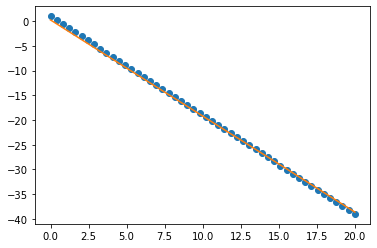

In [161]:
plt.plot(x_mini,y_mini,"o")
plt.plot(x_mini ,y_mini_pre)

Text(0, 0.5, 'loss')

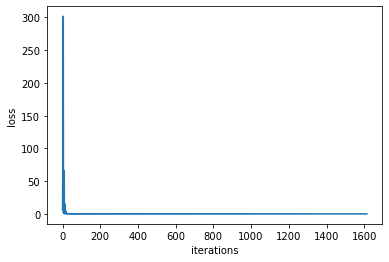

In [162]:
#plot loss vs iterations
plt.plot(costs)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

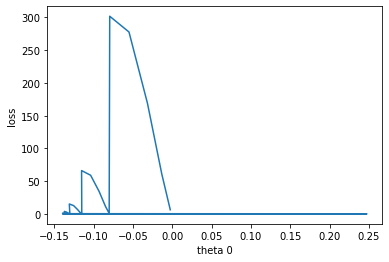

In [163]:
plt.plot(listth0,costs)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

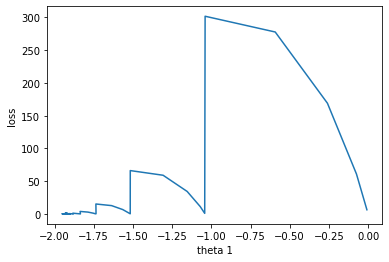

In [164]:
plt.plot(listth1,costs)
plt.xlabel("theta 1")
plt.ylabel("loss")

## try with shuffle

In [146]:
x_mini_shuffled=np.linspace(0,20)


In [147]:
np.random.shuffle(x_mini_shuffled)

In [148]:
y_mini_shuffled=-2*x_mini_shuffled+1

In [149]:
yPredicted ,ypred_list, th0_shuffled ,th1_shuffled ,costs_list,list_th0_shuffled ,list_th1_shuffled =MiniBatch_GD(x_mini_shuffled,y_mini_shuffled, 5,0.001, 1000)

epoch  0
cost=  11.927756376902689
epoch  1
cost=  0.6454733595589187
epoch  2
cost=  0.15607350227585143
epoch  3
cost=  0.15301907853891097
epoch  4
cost=  0.15741349119459563
epoch  5
cost=  0.1580863305639508
epoch  6
cost=  0.15762868557812187
epoch  7
cost=  0.15690130984404832
epoch  8
cost=  0.15611478198988832
epoch  9
cost=  0.15531789464972065
epoch  10
cost=  0.15452180841579877
epoch  11
cost=  0.15372905676369542
epoch  12
cost=  0.15294020195930205
epoch  13
cost=  0.15215535626907412
epoch  14
cost=  0.1513745293122517
epoch  15
cost=  0.1505977073579562
epoch  16
cost=  0.1498248714267296
epoch  17
cost=  0.14905600142230013
epoch  18
cost=  0.148291077074347
epoch  19
cost=  0.14753007815329813
epoch  20
cost=  0.146772984518954
epoch  21
cost=  0.14601977613117204
epoch  22
cost=  0.1452704330518978
epoch  23
cost=  0.14452493544522396
epoch  24
cost=  0.14378326357699872
epoch  25
cost=  0.14304539781433057
epoch  26
cost=  0.1423113186250798
epoch  27
cost=  0.1415

cost=  0.07596908505896484
epoch  149
cost=  0.07557922753666582
epoch  150
cost=  0.07519137068197428
epoch  151
cost=  0.07480550422788143
epoch  152
cost=  0.07442161796006594
epoch  153
cost=  0.0740397017166248
epoch  154
cost=  0.07365974538780169
epoch  155
cost=  0.07328173891572445
epoch  156
cost=  0.07290567229413356
epoch  157
cost=  0.07253153556812038
epoch  158
cost=  0.07215931883386337
epoch  159
cost=  0.07178901223836368
epoch  160
cost=  0.07142060597918835
epoch  161
cost=  0.07105409030420615
epoch  162
cost=  0.07068945551133261
epoch  163
cost=  0.07032669194827382
epoch  164
cost=  0.06996579001226662
epoch  165
cost=  0.06960674014982923
epoch  166
cost=  0.06924953285650623
epoch  167
cost=  0.06889415867661647
epoch  168
cost=  0.0685406082030033
epoch  169
cost=  0.06818887207678592
epoch  170
cost=  0.0678389409871116
epoch  171
cost=  0.06749080567090861
epoch  172
cost=  0.06714445691264154
epoch  173
cost=  0.06679988554406752
epoch  174
cost=  0.066457

epoch  250
cost=  0.04494933710192851
epoch  251
cost=  0.044718666465603615
epoch  252
cost=  0.04448917958294232
epoch  253
cost=  0.04426087037916731
epoch  254
cost=  0.04403373281067568
epoch  255
cost=  0.043807760864879024
epoch  256
cost=  0.04358294856004434
epoch  257
cost=  0.0433592899451364
epoch  258
cost=  0.04313677909965846
epoch  259
cost=  0.04291541013349669
epoch  260
cost=  0.0426951771867639
epoch  261
cost=  0.04247607442964577
epoch  262
cost=  0.042258096062244024
epoch  263
cost=  0.04204123631442548
epoch  264
cost=  0.041825489445666234
epoch  265
cost=  0.041610849744904074
epoch  266
cost=  0.04139731153038277
epoch  267
cost=  0.04118486914950441
epoch  268
cost=  0.04097351697867878
epoch  269
cost=  0.040763249423175024
epoch  270
cost=  0.040554060916973195
epoch  271
cost=  0.04034594592261742
epoch  272
cost=  0.04013889893106808
epoch  273
cost=  0.03993291446155731
epoch  274
cost=  0.03972798706144306
epoch  275
cost=  0.039524111306065944
epoch 

cost=  0.021985439090785288
epoch  390
cost=  0.021872614396319788
epoch  391
cost=  0.021760368694688118
epoch  392
cost=  0.021648699014619528
epoch  393
cost=  0.021537602400091706
epoch  394
cost=  0.02142707591025082
epoch  395
cost=  0.021317116619336732
epoch  396
cost=  0.021207721616601827
epoch  397
cost=  0.0210988880062373
epoch  398
cost=  0.02099061290729392
epoch  399
cost=  0.020882893453608126
epoch  400
cost=  0.020775726793723404
epoch  401
cost=  0.02066911009081746
epoch  402
cost=  0.020563040522625583
epoch  403
cost=  0.020457515281366374
epoch  404
cost=  0.02035253157366712
epoch  405
cost=  0.02024808662049084
epoch  406
cost=  0.0201441776570613
epoch  407
cost=  0.02004080193279088
epoch  408
cost=  0.01993795671120705
epoch  409
cost=  0.019835639269880502
epoch  410
cost=  0.01973384690035323
epoch  411
cost=  0.019632576908065837
epoch  412
cost=  0.01953182661228705
epoch  413
cost=  0.019431593346042886
epoch  414
cost=  0.019331874456045173


In [150]:
r2_score(y_mini_shuffled ,yPredicted )

0.9997106715337707

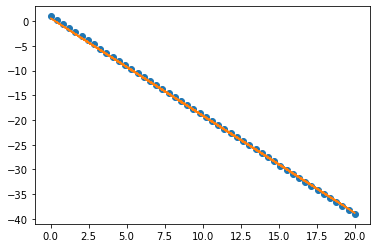

In [151]:
plt.plot(x_mini_shuffled,y_mini_shuffled,"o")
plt.plot(x_mini_shuffled ,yPredicted)

Text(0, 0.5, 'loss')

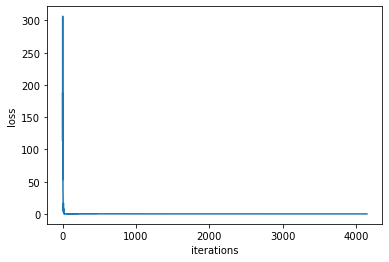

In [152]:
#plot loss vs iterations
plt.plot(costs_list)
plt.xlabel("iterations")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

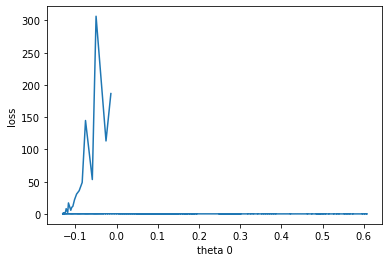

In [153]:
plt.plot(list_th0_shuffled,costs_list)
plt.xlabel("theta 0")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

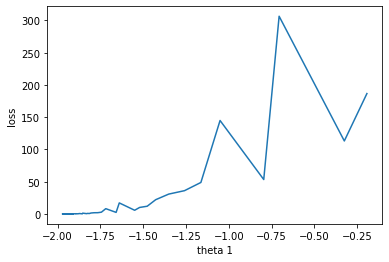

In [154]:
plt.plot(list_th1_shuffled,costs_list)
plt.xlabel("theta 1")
plt.ylabel("loss")